# Pipeline Hierárquico AV1 — Análise (validação bloco 16)

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

sns.set_theme(style='whitegrid')

root = Path('..').resolve()
project_root = root.parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from pesquisa.v5_pipeline import STAGE3_GROUPS

report = json.loads((root / 'logs/v5_pipeline_eval_val.json').read_text())
report_keys = {k: report[k] for k in ['dataset', 'final_accuracy']}
report_keys


{'dataset': 'pesquisa/v5_dataset/block_16/val.pt',
 'final_accuracy': 0.3956472415274305}

## Stage 1 — Métricas

In [3]:
report['stage1']

{'accuracy': 0.6268875353826837,
 'precision': 0.5370721467989211,
 'recall': 0.8293339606858838,
 'f1': 0.6519469840086313,
 'tp': 31727,
 'fp': 27347,
 'fn': 6529}

## Stage 2 — Matriz de confusão e macro-F1

In [4]:
stage2 = report['stage2']
stage2_conf = np.array(stage2['confusion_matrix'])
stage2_names = stage2['class_names']
stage2['macro_f1'], stage2_names, stage2_conf

(0.33408882714059956,
 ['NONE', 'SPLIT', 'RECT', 'AB', '1TO4'],
 array([[    0,     0,     0,     0,     0],
        [    0,  3607,   502,  1853,     0],
        [    0,  1645, 12065,  4055,     0],
        [    0,  3826,  4079,  6624,     0],
        [    0,     0,     0,     0,     0]]))

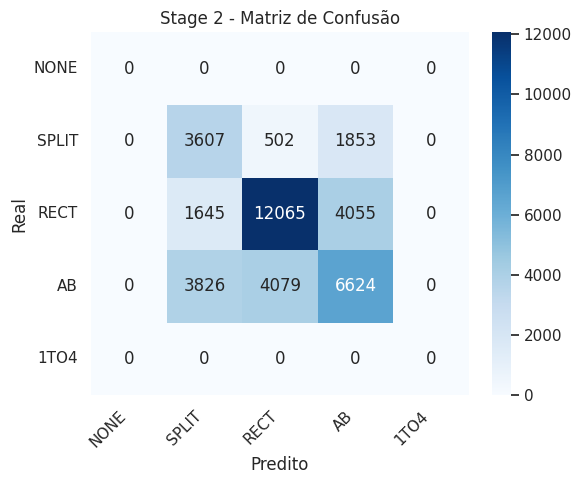

In [5]:
plt.figure(figsize=(6, 5))
sns.heatmap(stage2_conf, annot=True, fmt='d', cmap='Blues', xticklabels=stage2_names, yticklabels=stage2_names)
plt.title('Stage 2 - Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Stage 3 — Especialistas

In [6]:
stage3_metrics = report['stage3']['metrics']
stage3_conf = {k: np.array(v) for k, v in report['stage3']['confusion_matrices'].items()}
stage3_metrics

{'RECT': {'macro_f1': 0.725029376428433, 'support': 7491},
 'AB': {'macro_f1': 0.25262048298042794, 'support': 6497}}

In [7]:
{head: stage3_conf[head] for head in stage3_conf}

{'RECT': array([[2127, 1064],
        [ 940, 3360]]),
 'AB': array([[799,  23, 154, 644],
        [756,  28, 148, 657],
        [622,  13, 289, 723],
        [615,  21, 162, 843]]),
 '1TO4': array([[0, 0],
        [0, 0]])}

## Pipeline completo — Matriz de confusão

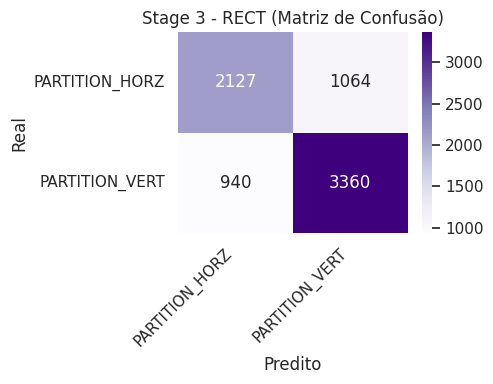

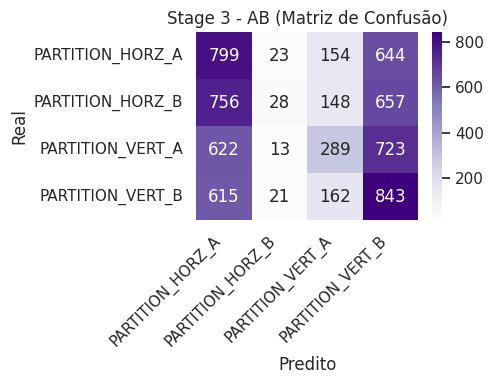

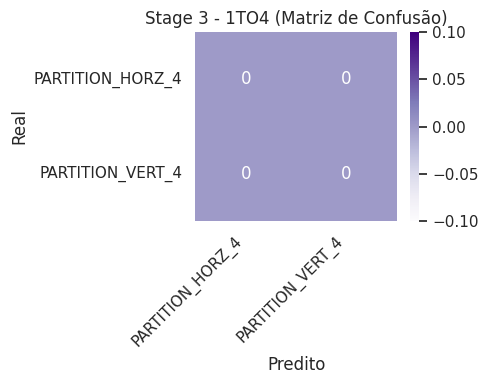

In [8]:
for head, conf in stage3_conf.items():
    plt.figure(figsize=(5, 4))
    labels = STAGE3_GROUPS[head]
    sns.heatmap(conf, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
    plt.title(f'Stage 3 - {head} (Matriz de Confusão)')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [9]:
final_conf = np.array(report['confusion_matrix'])
class_names = report['class_names']
class_names, final_conf

(['PARTITION_NONE',
  'PARTITION_HORZ',
  'PARTITION_VERT',
  'PARTITION_SPLIT',
  'PARTITION_HORZ_A',
  'PARTITION_HORZ_B',
  'PARTITION_VERT_A',
  'PARTITION_VERT_B',
  'PARTITION_HORZ_4',
  'PARTITION_VERT_4'],
 array([[25190,  4931,  9481,  9934,  1457,    65,   235,  1244,     0,
             0],
        [ 2544,  2127,  1064,   701,  1014,    63,   140,   494,     0,
             0],
        [ 2272,   940,  3360,   812,   753,    16,   390,  1075,     0,
             0],
        [  507,   143,   201,  3286,   792,    36,   177,   820,     0,
             0],
        [  353,   382,   428,   845,   799,    23,   154,   644,     0,
             0],
        [  272,   354,   271,  1051,   756,    28,   148,   657,     0,
             0],
        [  327,   307,   665,   848,   622,    13,   289,   723,     0,
             0],
        [  254,   180,   487,  1008,   615,    21,   162,   843,     0,
             0],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,
  

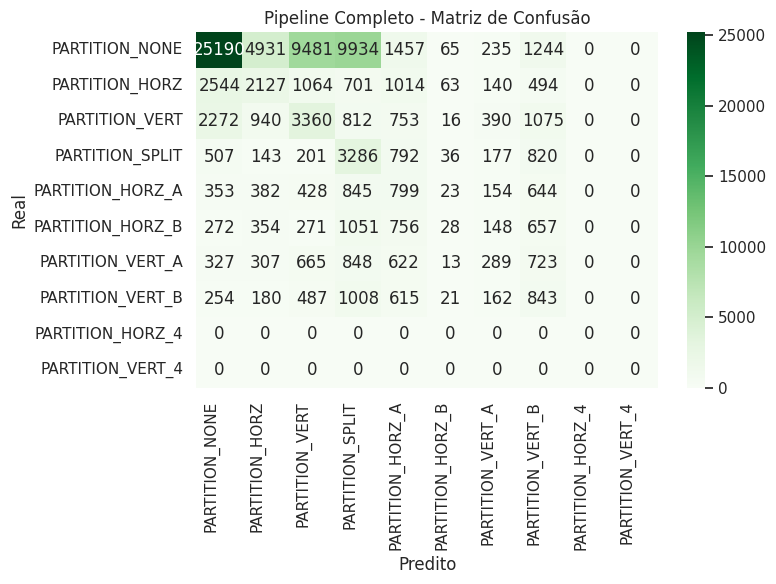

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Pipeline Completo - Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
